## Importing libraries

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

## Defining image dimensions

In [2]:
image_height = 800
image_width = 800

## Data directory

In [3]:
train_dir = "D:/AGSN/train"
test_dir = "D:/AGSN/test"

In [4]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Model Definition
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),  
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),  
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),  
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),  
    Dropout(0.5),
    Dense(7, activation='softmax') 
])

In [6]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the Model
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=16,
    class_mode='categorical'
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 16,
    epochs=15,
)

Found 77 images belonging to 7 classes.
Epoch 1/15


4/4 [==============================] - 36s 7s/step - loss: 2.1944 - accuracy: 0.1803
Epoch 2/15
4/4 [==============================] - 30s 7s/step - loss: 1.7679 - accuracy: 0.3281
Epoch 3/15
4/4 [==============================] - 29s 7s/step - loss: 1.7194 - accuracy: 0.3770
Epoch 4/15
4/4 [==============================] - 31s 8s/step - loss: 1.4643 - accuracy: 0.5082
Epoch 5/15
4/4 [==============================] - 31s 7s/step - loss: 1.3969 - accuracy: 0.5410
Epoch 6/15
4/4 [==============================] - 34s 8s/step - loss: 1.4169 - accuracy: 0.4375
Epoch 7/15
4/4 [==============================] - 31s 8s/step - loss: 1.2341 - accuracy: 0.5574
Epoch 8/15
4/4 [==============================] - 30s 7s/step - loss: 1.3411 - accuracy: 0.4754
Epoch 9/15
4/4 [==============================] - 32s 8s/step - loss: 1.0472 - accuracy: 0.6557
Epoch 10/15
4/4 [==============================] - 31s 7s/step - loss: 0.8471 - accuracy: 0.67

In [8]:
# Evaluate the Model
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=7,  
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

Found 21 images belonging to 7 classes.
3/3 [==============================] - 2s 538ms/step - loss: 0.7319 - accuracy: 0.7143
Test Accuracy: 0.7142857313156128


### Plot Model Accuracy

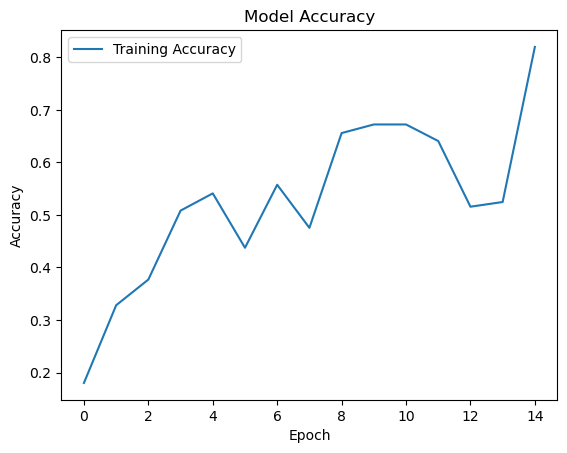

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()